# Resultados

In [1]:
import yaml
import pandas as pd
import matplotlib.pyplot as plt

from yaml.loader import SafeLoader

In [2]:
results = {}
with open('results.yaml', 'r') as f:
    data = list(yaml.load_all(f, Loader = SafeLoader))

for d in data:
    for item in d['Results']:
        key = list(item.keys())[0]
        if key not in results and key != 'wordOccurrences': results[key] = list()
        if key not in results and 'loveCount' not in results:
            results['loveCount'] = list()
            results['hateCount'] = list()

        if isinstance(item[key], list):
            results['loveCount'].append(item[key][0]['love'])
            results['hateCount'].append(item[key][1]['hate'])
        else:
            results[key].append(item[key])

data = pd.DataFrame(results)
data

,numThreads,blockLength,preparationTime,searchTime,totalTime,loveCount,hateCount,mostCommonWord
0,1,552290900,2.20140,63.7573,65.9587,204700,17000,Love
1,2,276145450,2.11305,35.4740,37.5870,204700,17000,Love
2,3,184096966,1.96706,25.4966,27.4637,204700,17000,Love
3,4,138072725,2.00691,22.7717,24.7786,204700,17000,Love
4,5,110458180,1.97349,20.2233,22.1968,204700,17000,Love
...,...,...,...,...,...,...,...,...
95,96,5753030,2.37863,22.5329,24.9116,204700,17001,Love
96,97,5693720,2.83227,21.9502,24.7825,204701,17000,Love
97,98,5635621,2.80828,22.1963,25.0045,204700,17000,Love
98,99,5578695,2.34803,22.1990,24.5470,204700,17000,Love


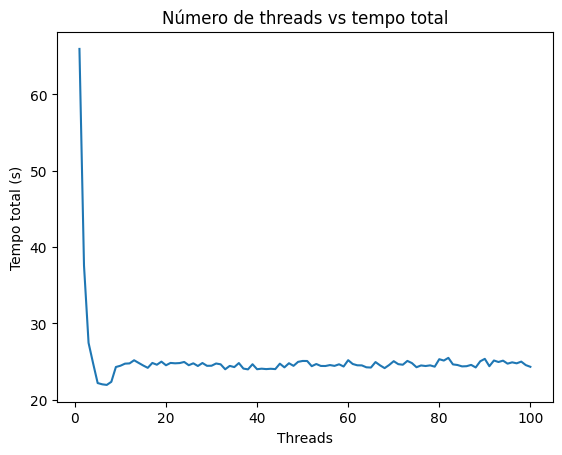

In [3]:
plt.plot(data['numThreads'], data['totalTime'])
plt.title('Número de threads vs tempo total')
plt.xlabel('Threads')
plt.ylabel('Tempo total (s)')
plt.show()

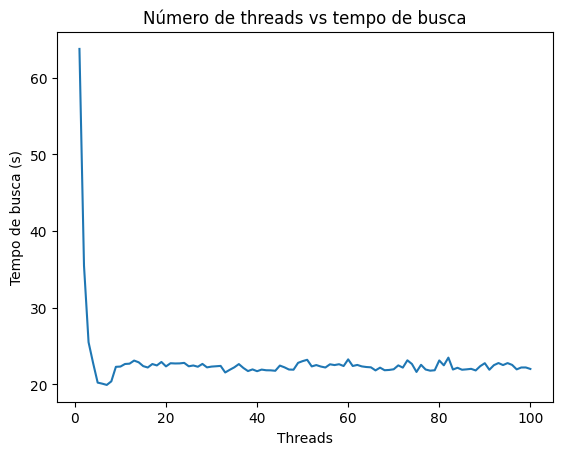

In [4]:
plt.plot(data['numThreads'], data['searchTime'])
plt.title('Número de threads vs tempo de busca')
plt.xlabel('Threads')
plt.ylabel('Tempo de busca (s)')
plt.show()